In [2]:
import time
import numpy as np
import os
from keras import layers, models, callbacks, regularizers, optimizers
from keras.layers import advanced_activations
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler as ms
import pandas as pd
import numpy as np
import numpy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import os
import glob
import datetime as dt

from datetime import timedelta
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import math
from keras.callbacks import Callback
from keras.optimizers import adagrad, adam
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

/home/student/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import pywt

In [4]:
df1 = pd.read_csv('filtered/alwyn_fam_1_filt_13.csv')
df2 = pd.read_csv('filtered/alwyn_non_1_filt_13.csv')
df3 = pd.read_csv('filtered/deepak_fam_1_filt_13.csv')
df4 = pd.read_csv('filtered/deepak_non_1_filt_13.csv')
df5 = pd.read_csv('filtered/murli_fam_2_filt_13.csv')
df6 = pd.read_csv('filtered/murli_non_1_filt_13.csv')
df7 = pd.read_csv('filtered/neeraj_fam_1_filt_13.csv')
df8 = pd.read_csv('filtered/neeraj_non_2_filt_13.csv')
df9 = pd.read_csv('filtered/nikhil_fam_1_filt_13.csv')
df10 = pd.read_csv('filtered/nikhil_non_1_filt_13.csv')
df11 = pd.read_csv('filtered/rahul_fam_1_filt_13.csv')
df12 = pd.read_csv('filtered/rahul_non_1_filt_13.csv')
df13 = pd.read_csv('filtered/rakesh_fam_1_filt_13.csv')
df14 = pd.read_csv('filtered/rakesh_non_1_filt_13.csv')
df15 = pd.read_csv('filtered/subham_fam_1_filt_13.csv')
df16 = pd.read_csv('filtered/subham_non_1_filt_13.csv')
df17 = pd.read_csv('filtered/sunny_fam_1_filt_13.csv')
df18 = pd.read_csv('filtered/sunny_non_1_filt_13.csv')
#df18 = pd.read_csv('filtered/sunny_non_1_filt_13.csv')
df19 = pd.read_csv('filtered/sus_fam_1_filt_13.csv')
df20 = pd.read_csv('filtered/sus_non_1_filt_13.csv')
df21 = pd.read_csv('filtered/utkarsh_fam_1_filt_13.csv')
df22 = pd.read_csv('filtered/utkarsh_non_1_filt_13.csv')
df23 = pd.read_csv('filtered/vageesh_fam_1_filt_13.csv')
df24 = pd.read_csv('filtered/vageesh_non_1_filt_13.csv')

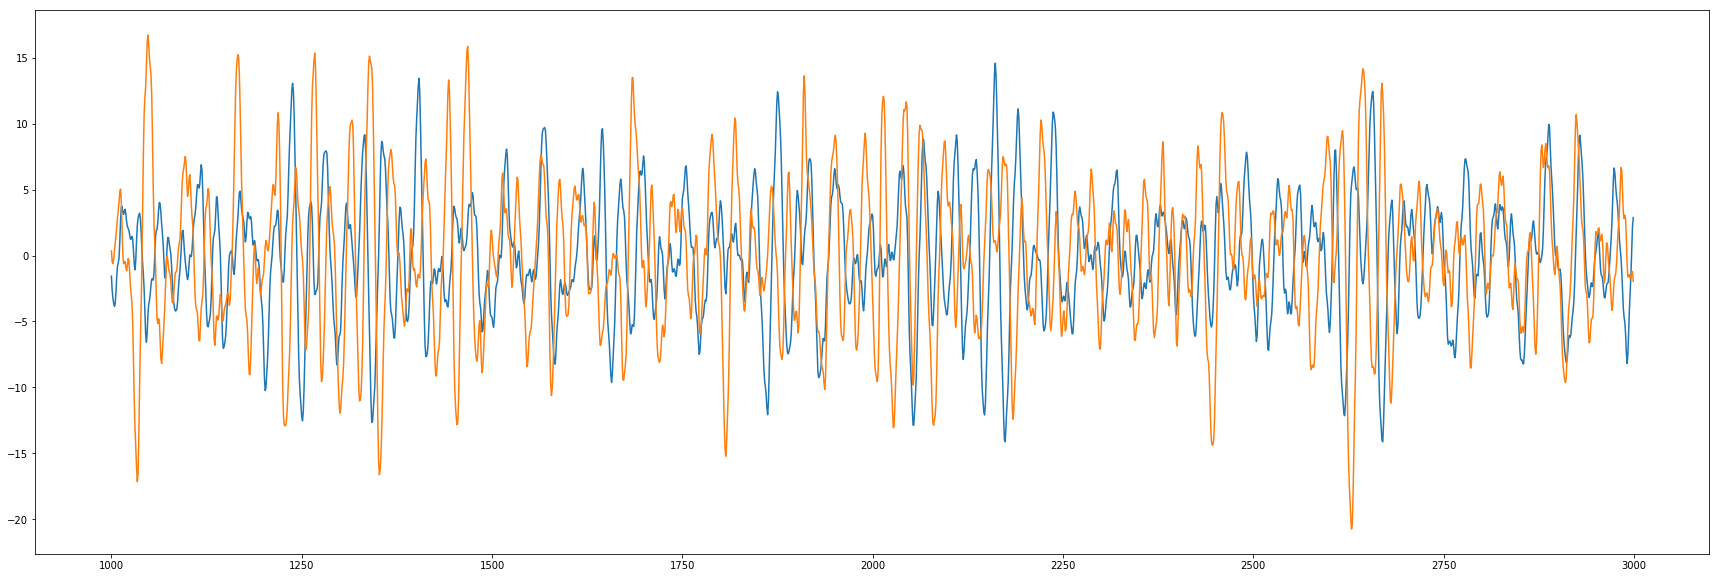

In [9]:
plt.figure(figsize=[30,10])
plt.plot(df1['P7'][1000:3000])
plt.plot(df2['P7'][1000:3000])

In [14]:
l=list(df1['P7'][0:13508])

In [15]:
df1.shape

(13509, 6)

In [17]:
a,b=pywt.swt(l,'db2', 2)

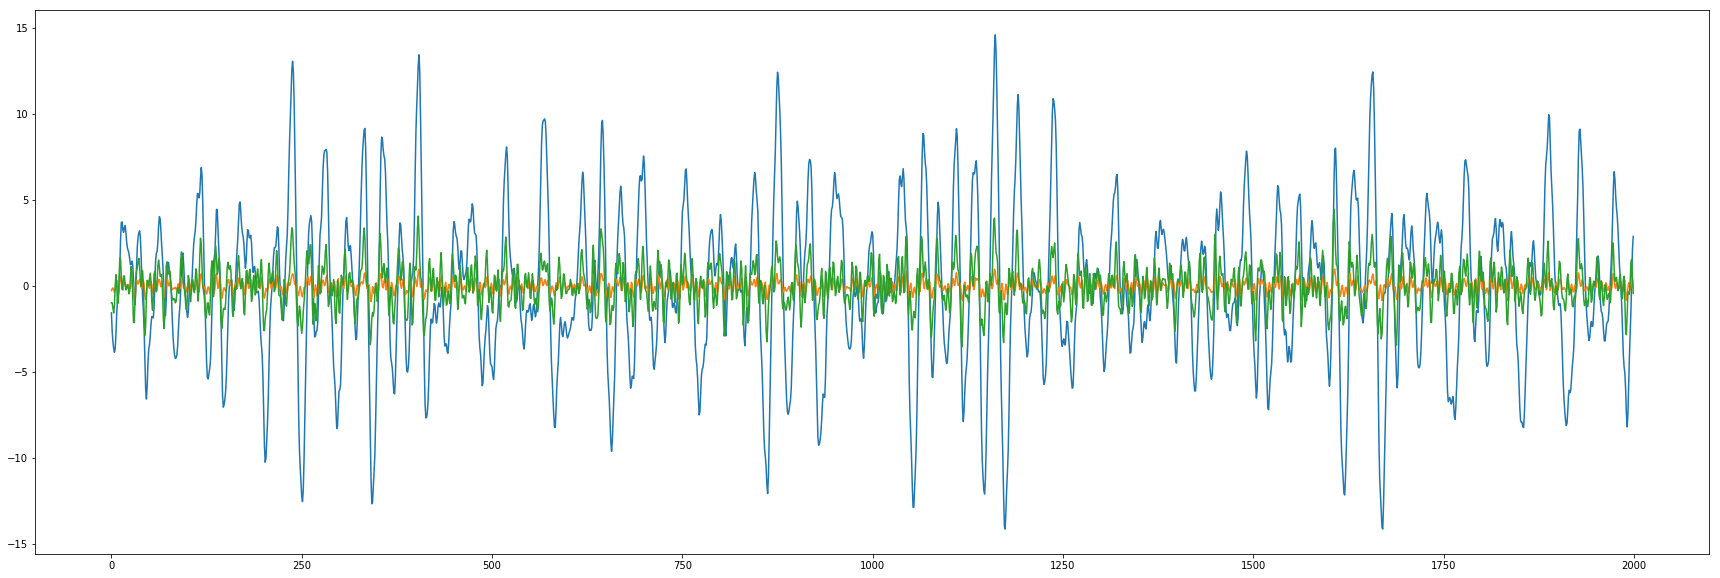

In [24]:
plt.figure(figsize=[30,10])
plt.plot(l[1000:3000])
plt.plot(b[1][1000:3000])
plt.plot(a[1][1000:3000])


In [15]:
df=pd.DataFrame(df1)
df=df.append(df2)
df=df.append(df3)
df=df.append(df4)
df=df.append(df5)
df=df.append(df6)
df=df.append(df7)
df=df.append(df8)
df=df.append(df9)
df=df.append(df10)
df=df.append(df11)
df=df.append(df12)
df=df.append(df13)
df=df.append(df14)
df=df.append(df15)
df=df.append(df16)
df=df.append(df17)
df=df.append(df18)
df=df.append(df19)
df=df.append(df20)
df=df.append(df21)
df=df.append(df22)
df=df.append(df23)
df=df.append(df24)

/home/student/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [16]:
df=df[0:327168]
Y=df['case'].values
df.drop(['case'], axis = 1, inplace = True)
df.drop(["time in sec"],inplace = True, axis = 1)
df.drop(['Unnamed: 0'],inplace = True, axis = 1)

In [17]:
x=df.iloc[:].values

In [18]:
a,b=pywt.swt(x[:,0],'bior1.1', 2)
c,d=pywt.swt(x[:,1],'bior1.1', 2)
e,f=pywt.swt(x[:,2],'bior1.1', 2)
g,h=pywt.swt(x[:,3],'bior1.1', 2)

In [19]:
dff1=pd.DataFrame()

In [20]:
dff1['a']=a[1]
dff1['b']=b[1]
dff1['c']=c[1]
dff1['d']=d[1]
dff1['e']=e[1]
dff1['f']=f[1]
dff1['g']=g[1]
dff1['h']=h[1]

In [21]:
x.shape

(327168, 4)

In [22]:
x=dff1.iloc[:].values
x=x.reshape(2556,128,8)
Y=Y.reshape(2556,128)

In [23]:
seed = 1
np.random.seed(seed)

In [24]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,Y,test_size=0.2, random_state=2)

In [25]:
print(y_train1.shape)

(2044, 128)


In [26]:
model = Sequential()
model.add(Dropout(0.2))
model.add(LSTM(8, input_shape=(128, 8), return_sequences=True,kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dropout(0.5))
model.add(LSTM(8, input_shape=(128, 8), return_sequences=False,kernel_regularizer=regularizers.l1(0.0001)))
model.add(Dropout(0.5))
#model.add(LSTM(128,return_sequences=False,kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.5))
#model.add(LSTM(128,kernel_regularizer=regularizers.l2(0.003)))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
filepath="waveletsweights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
early_stopping_monitor = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
callbacks_list = [checkpoint]
history1=model.fit(x_train1, y_train1,batch_size=64,callbacks=callbacks_list,verbose=1,epochs=200,validation_data=(x_test1, y_test1))

Train on 2044 samples, validate on 512 samples
Epoch 1/200
2044/2044 [==============================] - 4s 2ms/step - loss: 0.7030 - acc: 0.5007 - val_loss: 0.7020 - val_acc: 0.5073

Epoch 00001: val_acc improved from -inf to 0.50729, saving model to waveletsweights.best.hdf5
Epoch 2/200
2044/2044 [==============================] - 3s 1ms/step - loss: 0.7012 - acc: 0.5082 - val_loss: 0.6996 - val_acc: 0.5275

Epoch 00002: val_acc improved from 0.50729 to 0.52748, saving model to waveletsweights.best.hdf5
Epoch 3/200
2044/2044 [==============================] - 3s 1ms/step - loss: 0.6987 - acc: 0.5293 - val_loss: 0.6953 - val_acc: 0.5511

Epoch 00003: val_acc improved from 0.52748 to 0.55113, saving model to waveletsweights.best.hdf5
Epoch 4/200
2044/2044 [==============================] - 3s 1ms/step - loss: 0.6916 - acc: 0.5611 - val_loss: 0.6864 - val_acc: 0.5640

Epoch 00004: val_acc improved from 0.55113 to 0.56400, saving model to waveletsweights.best.hdf5
Epoch 5/200
2044/2044 [=

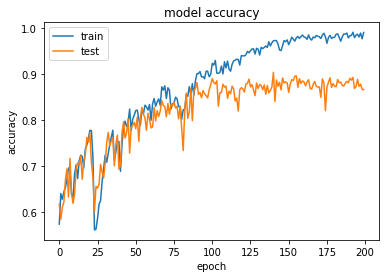

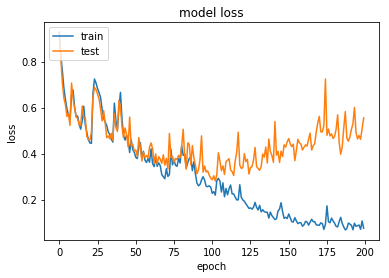

In [35]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
import json
with open('bior1.1.json', 'w') as f:
    json.dump(history1.history, f)

In [51]:
from keras.models import Model
intermediate_layer_model = Model(inputs=model.input,outputs=model.layers[5].output)

In [52]:
intermediate_output = intermediate_layer_model.predict(x_test1)

In [53]:
from sklearn.manifold import TSNE

In [58]:
tsne = TSNE(n_components=2, verbose = 1)
tsne1 = TSNE(n_components=2, verbose = 1,perplexity=50,random_state=2)

In [59]:
tsne_results = tsne.fit_transform(intermediate_output)
tsne_results1 = tsne1.fit_transform(intermediate_output)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 512 samples in 0.004s...
[t-SNE] Computed neighbors for 512 samples in 0.046s...
[t-SNE] Computed conditional probabilities for sample 512 / 512
[t-SNE] Mean sigma: 0.000109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.506020
[t-SNE] Error after 1000 iterations: 0.086282
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 512 samples in 0.001s...
[t-SNE] Computed neighbors for 512 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 512 / 512
[t-SNE] Mean sigma: 0.000344
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.130749
[t-SNE] Error after 1000 iterations: 0.063049


In [64]:
tsne_results

array([[-13.513284  , -13.199346  ],
       [ -4.6272297 , -21.544792  ],
       [ -5.980321  ,  22.824833  ],
       ...,
       [-12.622901  , -15.084941  ],
       [ -7.8431325 ,  21.818684  ],
       [-19.666807  ,  -0.37613532]], dtype=float32)

In [63]:
numpy.savetxt("bior1tsne.csv", tsne_results, delimiter=",")

In [60]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

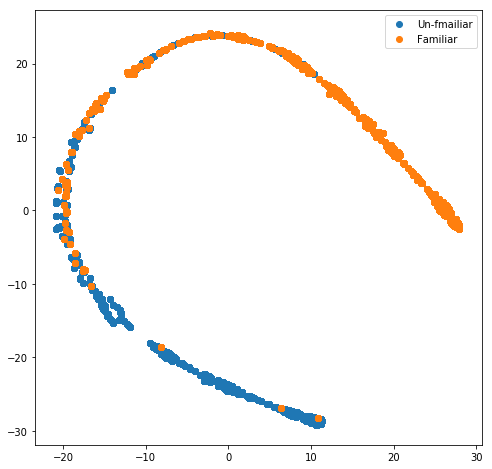

In [62]:
plt.figure(figsize=(8,8))
#plt.title('Intermediate Feature representation')
#plt.ylabel('Y-Feature')
#plt.xlabel('X-Feature')
for cl in range(2):
    indices = np.where(y_test1==cl)
    indices = indices[0]
    if cl==0:
        label='Un-fmailiar'
    else:
        label='Familiar'
    plt.scatter(tsne_results[indices,0], tsne_results[indices, 1], label=label)
plt.legend()
plt.show()

In [39]:
ypred=model.predict(x_test1)

In [40]:
y_flat=y_test1.flatten()
y_flat_pre=ypred.flatten()

In [41]:
for i in range (0,len(y_flat_pre)):
    if y_flat_pre[i]>=0.5:
        y_flat_pre[i]=1
    else:
        y_flat_pre[i]=0
    

In [42]:
ypred.shape

(512, 128)

In [43]:
y_test1.shape

(512, 128)

In [46]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [48]:
fpr, tpr, thresholds = roc_curve(y_flat, y_flat_pre)

In [53]:
thresholds

array([2., 1., 0.], dtype=float32)

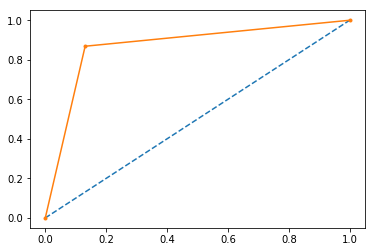

In [51]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')

In [44]:
from sklearn.metrics import confusion_matrix

In [19]:
tn, fp, fn, tp=confusion_matrix(y_flat, y_flat_pre).ravel()

In [20]:
print(tp)
print(fp)
print(tn)
print(fn)

30746
3554
28623
2613


In [21]:
print((tp+tn)/(tp+tn+fp+fn))
print((fp+fn)/(tp+tn+fp+fn))
print(tp/(tp+fp))
print(tp/(fn+tp))


0.9058990478515625
0.0941009521484375
0.8963848396501458
0.9216703138583291


In [58]:
(2*(0.8963848396501458)*(0.9216703138583291))/(0.8963848396501458+0.9216703138583291)

0.9088517418229651

In [22]:
conf=confusion_matrix(y_flat, y_flat_pre)

In [23]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_flat, y_flat_pre)

In [24]:
roc_auc = metrics.auc(fpr, tpr)

In [28]:
fp1=np.array([0.        , 0.04748734, 1.        ])

In [29]:
tpr1=np.array([0.       , 0.9370185, 1.       ])

In [32]:
roc_auc1 = metrics.auc(fp1, tpr1)

In [45]:
fpr2=np.array([0.        , 0.22923206, 1.        ])
tpr2=np.array([0.        , 0.95083785, 1.        ])

In [46]:
roc_auc2 = metrics.auc(fpr2, tpr2)

In [48]:
fpr3=np.array([0.        , 0.10678435, 1.        ])
tpr3=np.array([0.        , 0.83108007, 1.        ])

In [49]:
roc_auc3 = metrics.auc(fpr3, tpr3)

In [51]:
fpr4=np.array([0.        , 0.00174037, 1.        ])
tpr4=np.array([0.        , 0.68853982, 1.        ])

In [52]:
roc_auc4 = metrics.auc(fpr4, tpr4)

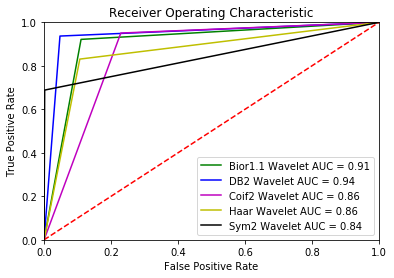

In [59]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'Bior1.1 Wavelet AUC = %0.2f' % roc_auc)
plt.plot(fp1, tpr1, 'b', label = 'DB2 Wavelet AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'm', label = 'Coif2 Wavelet AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'y', label = 'Haar Wavelet AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'Black', label = 'Sym2 Wavelet AUC = %0.2f' % roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.9056093745380156

In [22]:
ypre=np.argmax(ypred,axis=1)

In [23]:
print(y_test1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


In [37]:
#print(x_test1.shape)
y_flat=y_test1.flatten()
y_flat_pre=ypred.flatten()

In [39]:
y_flat_pre

array([0.8384344 , 0.8348841 , 0.83308256, ..., 0.98428786, 0.98462385,
       0.9841037 ], dtype=float32)

In [ ]:
for i in y_flat_pre:
    if i>0.5

In [52]:
for i in range (0,len(y_flat_pre)):
    if y_flat_pre[i]>=0.5:
        y_flat_pre[i]=1
    else:
        y_flat_pre[i]=0
    

In [41]:
y_flat_pre

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [53]:
tn, fp, fn, tp=confusion_matrix(y_flat, y_flat_pre).ravel()

In [54]:
print(tn)
print(fp)
print(fn)
print(tp)

25666
6511
4666
28693


In [55]:
(tp+tn)/(tp+tn+fp+fn)

0.8294525146484375

In [56]:
(fp+fn)/(tp+tn+fp+fn)

0.1705474853515625

In [57]:
tp/(tp+fp)

0.815049426201568

In [58]:
tp/(fn+tp)

0.8601277016697143

In [60]:
2*(0.815049426201568*0.8601277016697143)/(0.815049426201568+0.8601277016697143)

0.8369820457097852

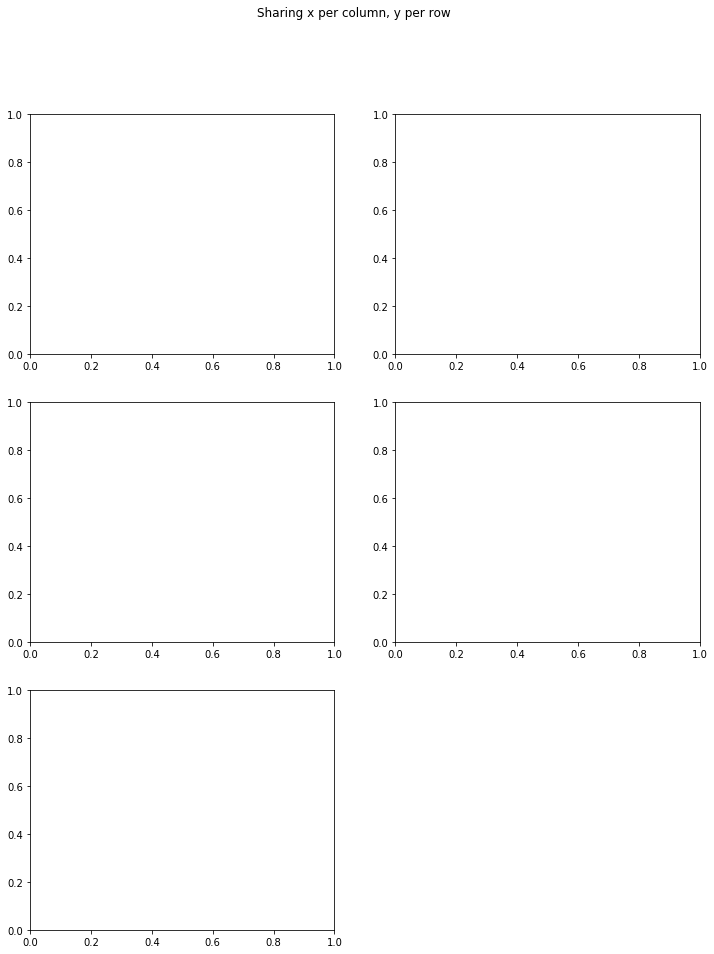

In [20]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Fixing random state for reproducibility
f, ax= plt.subplots(3, 2, figsize=(12, 15))
f.suptitle('Sharing x per column, y per row')
plt.plot(x)
plt.plot(y)
plt.plot(x)
plt.plot(y)
plt.plot(x)
f.delaxes(ax[2,1])

In [7]:
signal=df1['P7']
signal=np.asarray(signal)

In [9]:
len(signal)

13509

In [10]:
i,j=pywt.swt(signal[0:13508],'db2', 2)


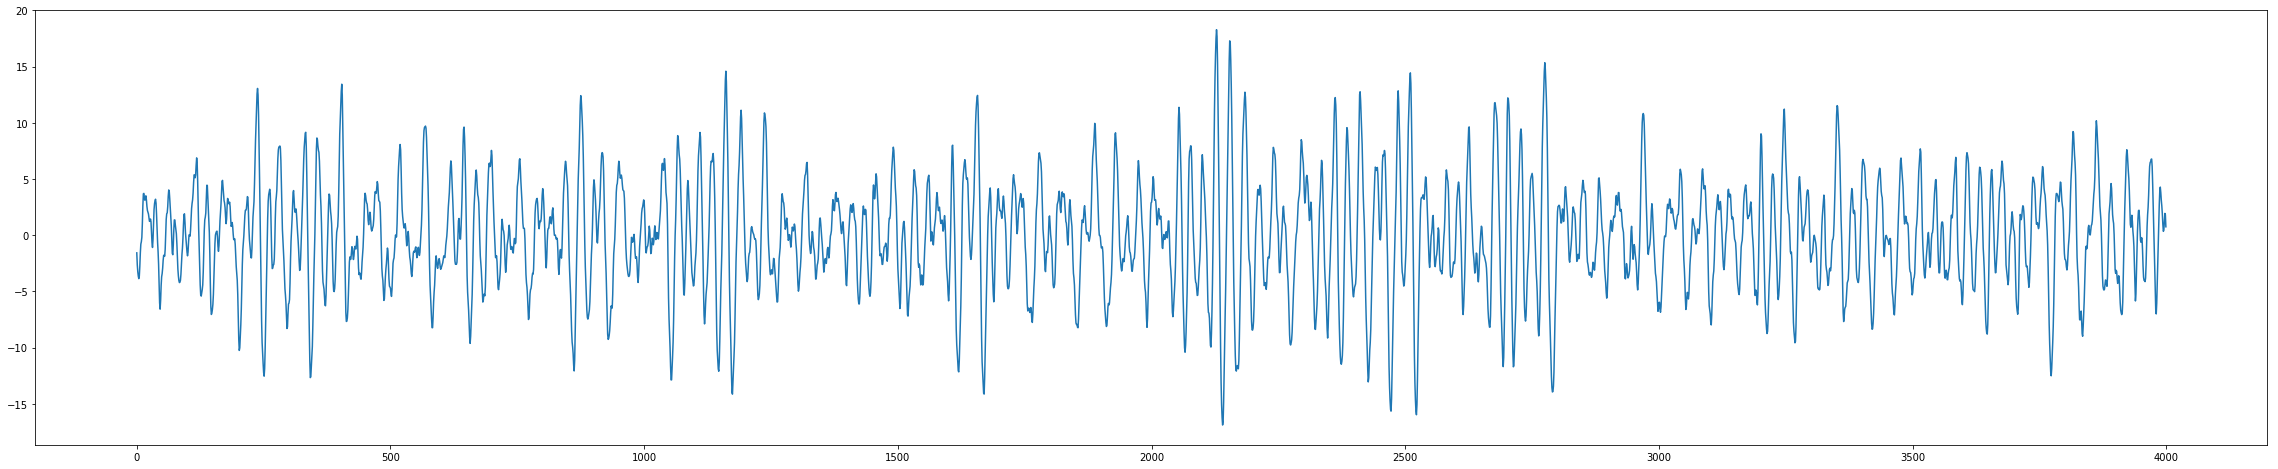

In [24]:
plt.figure(figsize=(40,8))
plt.plot(signal[1000:5000])

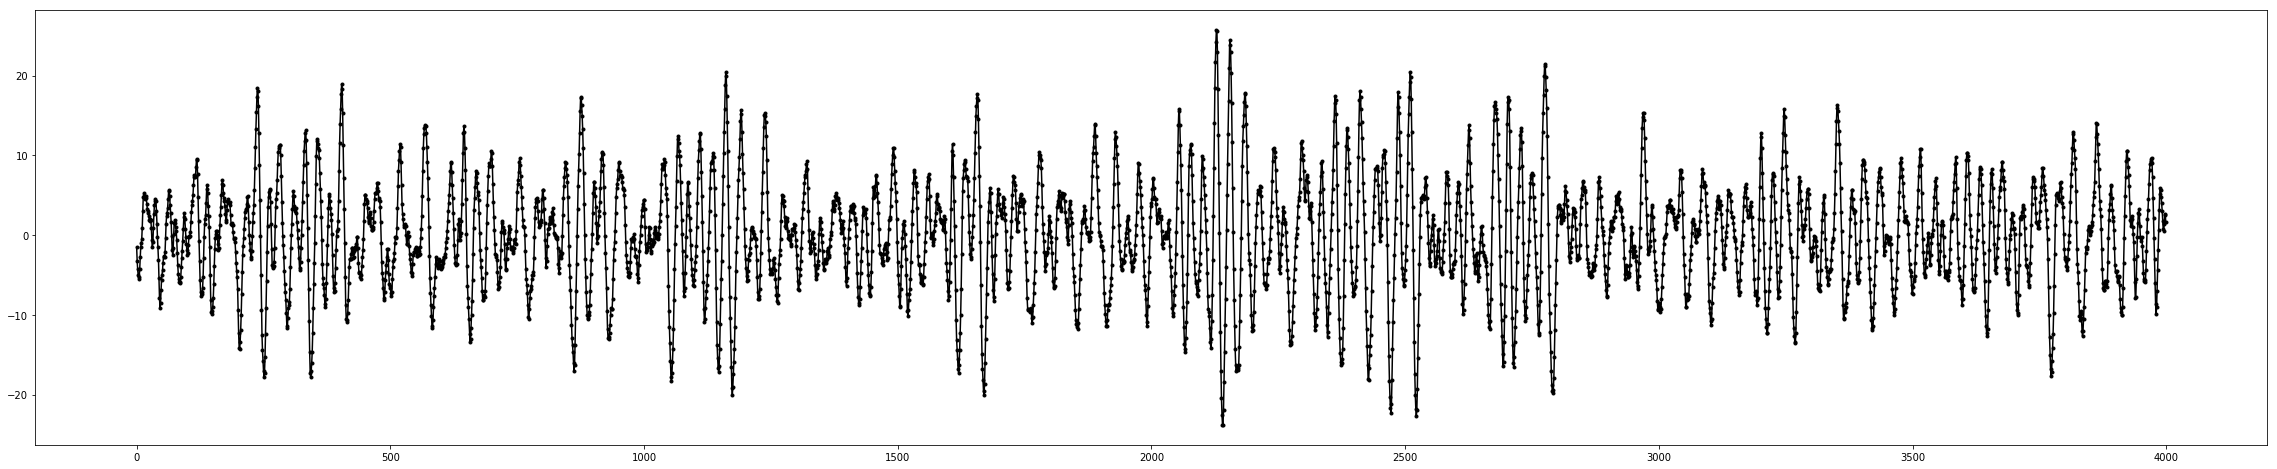

In [41]:
plt.figure(figsize=(40,8))
plt.plot(j[0][1000:5000],color='k',marker='.')
#plt.plot(j[1][1000:5000],color='B')
#plt.plot(i[0][1000:5000],color='r')
#plt.plot(i[1][1000:5000],color='g')

In [ ]:
plt.figure(figsize=(8,8))